---   
 <img align="left" width="75" height="75"  src="https://upload.wikimedia.org/wikipedia/en/c/c8/University_of_the_Punjab_logo.png"> 

<h1 align="center">Project Demonstration</h1>
<h1 align="center">Course: Tools and Techniques for Data Science</h1>

---
<h5><div align="right">Instructor: Muhammad Arif Butt, Ph.D.</div></h5>     
<h5><div align="right">Student: Hassan Mazhar Khan (MSDSF21M506)</div></h5>     

<h1 align="center">Pakistan Suicide Bombing Data</h1>

<h3 align="center">Exploratory Data Analysis</h3>

<img align="centre" width="500" height="500"  src="images/pakistan.jpeg"  >

<a href='#'>Agenda</a><br>
<a href='#intro'>1- Introduction</a><br>
<a href='#about'>2- What exactly is this notebook about</a><br>
<a href='#load'>3- Loading Libraries</a><br>
<a href='#import'>4- Import data</a><br>
<a href='#start'>5- Lets start analysing the data</a><br>

# <a id='pg015'>1. Introduction</a><br>

<text>My main objective was to work on Data related to Pakistan such as data from the recent census - In order to find out answer for some of KPI's for citizens of Pakistan. So, what I came to know is that this data has not been made public by Government.

Then I found out following datasets for our country:
<ul>
<li>Intellectual Capital of Pakistan</li>
<li>Pakistan Suicide Bombing Data</li>
<li>Pakistan Stock Exchange Data</li>
<li>Pakistan Start Up’s Data</li>
<li>Pakistan Job Market Data</li>
</ul>
<text> 

# <a id='pg015'>2. What exactly is this notebook about</a><br>

<text>After all this research I decided to squeeze my idea to following dataset:
<ul>
<li>Pakistan Suicide Bombing Data</li>
</ul>
So, now question arises what I want to explore from both of this datasets. Here will be some of my Exploratory inquiries:
<ul>
<li>How many people got killed and injured per year</li>
<li>Number of Suicide Blasts happened </li>
<li>Number of Victims for suicide bombings on timeline</li>
<li>Holiday Type bifurcation with Number of Blast</li>
<li>Blast Numbers in Provinces, City and many such questions</li>
</ul>
    
This notebook is going to explain all such information in more inquisitive and elaborative manner
<text> 

# <a id='pg001'>3. Let's start the analysis by loading required libraries</a><br>

In [1]:
# Packages Import Section
import numpy as np # data processing
import pandas as pd # data acquisition, processing & manipulation
import datetime # for datetime manipulation
import math
# Import for Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors # for map tooltip

<img align="centre" width="500" height="500"  src="images/data_acquisition.gif"  >

# <a id='pg002'>4- Import the given datasets</a>

In [2]:
# Data Acquistion Section
# Loading Data from directory path

df_suicide_data = pd.read_csv("Datasets\Pakistan_Suicide_Data.csv", encoding='Windows-1252')

# Printing shape of Data loaded 
print("Suicide Data Shape: ", df_suicide_data.shape)

Suicide Data Shape:  (496, 26)


In [3]:
# Data representation using css table format 
df_suicide_data.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#00FF7F'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:hover',
  'props': [('background', '#FFE4C4')]},
 
]
).hide_index()

S#,Date,Islamic Date,Blast Day Type,Holiday Type,Time,City,Latitude,Longitude,Province,Location,Location Category,Location Sensitivity,Open/Closed Space,Influencing Event/Event,Target Type,Targeted Sect if any,Killed Min,Killed Max,Injured Min,Injured Max,No. of Suicide Blasts,Explosive Weight (max),Hospital Names,Temperature(C),Temperature(F)
1,Sunday-November 19-1995,25 Jumaada al-THaany 1416 A.H,Holiday,Weekend,nan,Islamabad,33.718000,73.0718,Capital,Egyptian Embassy,Foreign,High,Closed,nan,Foreigner,None,14.000000,15.000000,nan,60,2.000000,nan,nan,15.835000,60.503000
2,Monday-November 6-2000,10 SHa`baan 1421 A.H,Working Day,nan,nan,Karachi,24.991800,66.9911,Sindh,office of Nawa-e-Waqt,Office Building,Low,Closed,nan,Media,None,nan,3.000000,nan,3,1.000000,nan,nan,23.770000,74.786000
3,Wednesday-May 8-2002,25 safar 1423 A.H,Working Day,nan,7:45 AM,Karachi,24.991800,66.9911,Sindh,Pakistan Navy bus Parked outside Five Star Sheraton Hotel,Hotel,Medium,Closed,nan,Foreigner,Christian,13.000000,15.000000,20.000000,40,1.000000,2.5 Kg,1.Jinnah Postgraduate Medical Center 2. Civil Hospital Karachi 3. PN Shifa,31.460000,88.628000
4,Friday-June 14-2002,3 Raby` al-THaany 1423 A.H,Working Day,nan,11:10:00 AM,Karachi,24.991800,66.9911,Sindh,US Consulate Civil Lines Area,Foreign,High,Closed,nan,Foreigner,Christian,nan,12.000000,nan,51,1.000000,nan,nan,31.430000,88.574000
5,Friday-July 4-2003,4 Jumaada al-awal 1424 A.H,Working Day,nan,nan,Quetta,30.209500,67.0182,Baluchistan,Imambargah MeCongy Road Quetta,Religious,Medium,Closed,during Friday prayer,Religious,Shiite,44.000000,47.000000,nan,65,1.000000,nan,1.CMH Quetta 2.Civil Hospital 3. Boland Medical Complex,33.120000,91.616000
6,Thursday-December 25-2003,2 Thw al-Qi`dah 1424 A.H.,Holiday,Christmas/birthday of Quaid-e-Azam,1:40:00 PM/1:42:00 PM,Rawalpindi,33.605800,73.0437,Punjab,Jhanda Chichi area rawalpindi,Mobile,Low,Open,president's/chief of army staff convoy passing from there,Military,None,16.000000,18.000000,nan,50,2.000000,30kg in each car,1.District headquarters Hospital,9.445000,49.001000
7,Saturday-February 28-2004,8 MuHarram 1425 A.H,Working Day,nan,nan,Rawalpindi,33.605800,73.0437,Punjab,Yadgar-i-Hussaini in Satellite Town,Religious,Medium,Closed,maghrib prayer was in process,Religious,shiite,nan,1.000000,3.000000,4,1.000000,nan,nan,15.275000,59.495000
8,Friday-May 7-2004,18 Raby` al-awal 1425 A.H,Working Day,nan,1:20:00/1:17:00 PM,Karachi,24.991800,66.9911,Sindh,Karachi Shia mosque Sindh Madrassatul Islam,Religious,Medium,Closed,Friday prayer was in progress,Religious,shiite,14.000000,15.000000,96.000000,200,1.000000,2kg,Civil hospital,33.860000,92.948000
9,Monday-May 31-2004,nan,Working Day,nan,evening,Karachi,24.991800,66.9911,Sindh,Imambargah off M.A Jinnah road near Numaish intersection,Religious,Medium,Closed,nan,Religious,Shiite,16.000000,18.000000,nan,35,1.000000,nan,Civil hospital-Liaquat National hospital-Jinnah Postgraduate Medical Center,31.605000,88.889000
10,Thursday-June 3-2004,15 Raby` al-THaany 1425 A.H,Working Day,nan,nan,North waziristan,32.974600,70.1456,FATA,checkpost in north waziristan-close to Afghanistan border,Military,High,Open,nan,Military,None,nan,2.000000,nan,2,1.000000,nan,nan,27.180000,80.924000


In [4]:
# drop un-wanted column by name i.e "S#"
del df_suicide_data['S#']

# printing shape of new data 
print("Suicide Data Shape after removing S# Column: ", df_suicide_data.shape)

Suicide Data Shape after removing S# Column:  (496, 25)


In [5]:
# Show List of Columns
print("Suicide Data List of Columns:\n\n",df_suicide_data.columns.tolist())

Suicide Data List of Columns:

 ['Date', 'Islamic Date', 'Blast Day Type', 'Holiday Type', 'Time', 'City', 'Latitude', 'Longitude', 'Province', 'Location', 'Location Category', 'Location Sensitivity', 'Open/Closed Space', 'Influencing Event/Event', 'Target Type', 'Targeted Sect if any', 'Killed Min', 'Killed Max', 'Injured Min', 'Injured Max', 'No. of Suicide Blasts', 'Explosive Weight (max)', 'Hospital Names', 'Temperature(C)', 'Temperature(F)']


# <a id='pg003'>Column Renaming for Accessibility</a>

In [6]:
# Change/Rename the Name of Column for Easy Access of EDA
df_suicide_data.rename( columns = { #'Date' : 'date', 
                      'Islamic Date' : 'Islamic-Date', 
                      'Blast Day Type' : 'Blast-Day-Type', 'Holiday Type' : 'Holiday-Type', 
                      #'Time' : 'time', 'City' : 'city', 'Latitude' : 'latitude', 
                      #'Longitude' : 'longitude', 'Province' : 'province', 'Location' : 'location',
                      'Location Category' : 'Location-Category', 'Location Sensitivity' : 'Location-Sensitivity', 
                      'Open/Closed Space' : 'Open-Or-Closed-Space', 'Influencing Event/Event' : 'Influencing-Event', 
                      'Target Type' : 'Target-Type', 'Targeted Sect if any' : 'Targeted-Sect',
                      'Killed Min' : 'Killed-Min', 'Killed Max' : 'Killed-Max', 'Injured Min' : 'Injured-Min', 
                      'Injured Max' : 'Injured-Max', 'No. of Suicide Blasts' : 'No-Of-Suicide-Blasts', 
                      'Explosive Weight (max)' : 'Explosive-Weight-Max', 'Hospital Names' : 'Hospital-Names',
                      'Temperature(C)' :'Temp-C', 'Temperature(F)': 'Temp-F'}, inplace=True )
print("Suicide Data List of Columns:\n\n",df_suicide_data.columns.tolist())

Suicide Data List of Columns:

 ['Date', 'Islamic-Date', 'Blast-Day-Type', 'Holiday-Type', 'Time', 'City', 'Latitude', 'Longitude', 'Province', 'Location', 'Location-Category', 'Location-Sensitivity', 'Open-Or-Closed-Space', 'Influencing-Event', 'Target-Type', 'Targeted-Sect', 'Killed-Min', 'Killed-Max', 'Injured-Min', 'Injured-Max', 'No-Of-Suicide-Blasts', 'Explosive-Weight-Max', 'Hospital-Names', 'Temp-C', 'Temp-F']


<img align="centre" width="500" height="500"  src="images/data-profiling.jpg"  >

# <a id='pg004'>Review on Data Columns</a>

In [7]:
# Check dataset info and verify the datatype
df_suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  496 non-null    object 
 1   Islamic-Date          342 non-null    object 
 2   Blast-Day-Type        486 non-null    object 
 3   Holiday-Type          72 non-null     object 
 4   Time                  285 non-null    object 
 5   City                  496 non-null    object 
 6   Latitude              493 non-null    float64
 7   Longitude             493 non-null    object 
 8   Province              496 non-null    object 
 9   Location              493 non-null    object 
 10  Location-Category     461 non-null    object 
 11  Location-Sensitivity  460 non-null    object 
 12  Open-Or-Closed-Space  461 non-null    object 
 13  Influencing-Event     191 non-null    object 
 14  Target-Type           470 non-null    object 
 15  Targeted-Sect         4

# <a id='pg005'>Data Profiling on Columns</a>

In [8]:
# Analyze the Null / Missing Values
df_suicide_data.isna().sum()

Date                      0
Islamic-Date            154
Blast-Day-Type           10
Holiday-Type            424
Time                    211
City                      0
Latitude                  3
Longitude                 3
Province                  0
Location                  3
Location-Category        35
Location-Sensitivity     36
Open-Or-Closed-Space     35
Influencing-Event       305
Target-Type              26
Targeted-Sect            48
Killed-Min              146
Killed-Max               16
Injured-Min             131
Injured-Max              32
No-Of-Suicide-Blasts     82
Explosive-Weight-Max    324
Hospital-Names          199
Temp-C                    5
Temp-F                    7
dtype: int64

In [9]:
# dropping un-necessary columns i.e: 
# Time, Influencing-Event, No-Of-Suicide-Blasts,
# Explosive-Weight-Max, Hospital-Names, Temp-C, Temp-F

df_suicide_data.drop(['Time','Influencing-Event', 'No-Of-Suicide-Blasts'], axis=1, inplace=True)
df_suicide_data.drop(['Explosive-Weight-Max', 'Hospital-Names', 'Temp-C', 'Temp-F'], axis=1, inplace=True)

# Casting of data type column
df_suicide_data['Date'] = pd.to_datetime(df_suicide_data['Date'], errors="coerce")

#printing shape of dataset now
print("Suicide Data Shape after removing multiple Columns: ", df_suicide_data.shape)

Suicide Data Shape after removing multiple Columns:  (496, 18)


In [10]:
# Check dataset info and verify the datatype
df_suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  495 non-null    datetime64[ns]
 1   Islamic-Date          342 non-null    object        
 2   Blast-Day-Type        486 non-null    object        
 3   Holiday-Type          72 non-null     object        
 4   City                  496 non-null    object        
 5   Latitude              493 non-null    float64       
 6   Longitude             493 non-null    object        
 7   Province              496 non-null    object        
 8   Location              493 non-null    object        
 9   Location-Category     461 non-null    object        
 10  Location-Sensitivity  460 non-null    object        
 11  Open-Or-Closed-Space  461 non-null    object        
 12  Target-Type           470 non-null    object        
 13  Targeted-Sect       

<img align="centre" width="500" height="500"  src="images/data-transformations.png"  >

# <a id='pg006'>Transforming : Holiday-Type Column of Dataset</a>

In [11]:
# Data cleansing by capitalizing and strip white spaces
# Reference : https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].str.capitalize()
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].str.strip()

# Printing intial form of Data Column Content : Holiday-Type
print("Suicide Holiday Type Unique List:\n\n",df_suicide_data['Holiday-Type'].unique().tolist())

Suicide Holiday Type Unique List:

 ['Weekend', nan, 'Christmas/birthday of quaid-e-azam', 'Ashura', 'Eid milad un-nabi', 'Iqbal day', 'Eid-ul-azha', 'Labour day', 'Eid-ul-fitar', 'Pakistan day', 'Defence day', 'Christmas/ birthday of quaid-e-azam', 'General elections', 'Eid holidays', 'Ashura holiday', 'Eid ul azha holiday']


In [12]:
# Replacing values for Data visualaization
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace("Christmas/birthday of quaid-e-azam", "Christmas/Quaid-e-azam's Birthday" )
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Christmas/ birthday of quaid-e-azam', "Christmas/Quaid-e-azam's Birthday")
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Ashura', 'Ashura-Holiday')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Ashura holiday', 'Ashura-Holiday')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Eid Milad un-nabi', 'Eid Milad-Un-Nabi')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Iqbal day', 'Iqbal-Day')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Eid-ul-azha', 'Eid-ul-Azha')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Eid ul azha holiday', 'Eid-ul-Azha')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Labour day', 'Labour Day')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Eid-ul-fitar', 'Eid-ul-Fitar')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Pakistan day', 'Pakistan-Day')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Defence day', 'Defence-day')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('General elections', 'General-Elections')
df_suicide_data['Holiday-Type'] = df_suicide_data['Holiday-Type'].replace('Eid holidays', 'Eid-Holidays')

# Printing changed form of Data Column Content : Holiday-Type
print("Suicide Holiday Type Unique List:\n\n",df_suicide_data['Holiday-Type'].unique().tolist())

Suicide Holiday Type Unique List:

 ['Weekend', nan, "Christmas/Quaid-e-azam's Birthday", 'Ashura-Holiday', 'Eid milad un-nabi', 'Iqbal-Day', 'Eid-ul-Azha', 'Labour Day', 'Eid-ul-Fitar', 'Pakistan-Day', 'Defence-day', 'General-Elections', 'Eid-Holidays']


# <a id='pg007'>Transforming : Blast-Day-Type Column of Dataset</a>

In [13]:
# Data cleansing by capitalizing and strip white spaces
# Reference : https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html
df_suicide_data['Blast-Day-Type'] = df_suicide_data['Blast-Day-Type'].str.capitalize()
df_suicide_data['Blast-Day-Type'] = df_suicide_data['Blast-Day-Type'].str.strip()

# Printing intial form of Data Column Content : Holiday-Type
print("Suicide Blast Day Type Unique List:\n\n",df_suicide_data['Blast-Day-Type'].unique().tolist())

Suicide Blast Day Type Unique List:

 ['Holiday', 'Working day', nan, 'Weekend']


# <a id='pg008'>Transforming : City Column of Dataset</a>

In [14]:
# Printing list of all cities present in Data
print("Number of Cities in Data : ", len(df_suicide_data['City'].unique()), "\n\nCity List in data:", df_suicide_data['City'].unique())

Number of Cities in Data :  93 

City List in data: ['Islamabad' 'Karachi' 'Karachi ' 'Quetta' 'Rawalpindi' 'North waziristan'
 'Kohat' 'Attock ' 'Sialkot' 'Lahore ' 'Swat' 'Hangu' 'Bannu'
 'North Waziristan' 'Lasbela' 'Malakand ' 'Peshawar' 'Peshawar '
 'D.I Khan ' 'Lakki Marwat' 'Tank' 'Islamabad ' 'Quetta ' 'Gujrat'
 'Charsadda' 'Tank ' 'Swat ' 'D.I Khan' 'Kohat ' 'Kuram Agency '
 'Shangla ' 'Bajaur Agency' 'South Waziristan' 'Haripur' 'bannu'
 'karachi ' 'Sargodha' 'Nowshehra' 'Charsadda ' 'Mohmand agency'
 'Dara Adam Khel' 'Khyber Agency' 'Mardan' 'Bhakkar ' 'Orakzai Agency'
 'Mohmand Agency' 'Buner' 'D.G Khan ' 'Pishin' 'Chakwal ' 'Lahore'
 'Upper Dir' 'Muzaffarabad' 'swat' 'Totalai' 'Multan' 'D.G Khan'
 'Lower Dir' 'Lakki marwat' 'Sudhanoti' 'Khyber Agency ' 'peshawar'
 'Poonch' 'Mansehra' 'Karak' 'Mohmand Agency ' 'South waziristan'
 'lakki marwat' 'Swabi ' 'Dara Adam khel' 'karachi' 'Shikarpur' 'Sukkur'
 'Chaman' 'D. I Khan' 'Khanewal' 'Fateh Jang' 'Taftan' 'Tirah Valley'
 'Wa

In [15]:
# Data Cleansing by strip and replacing data content
df_suicide_data['City'] = df_suicide_data['City'].str.strip()
df_suicide_data['City'] = df_suicide_data['City'].str.title()
df_suicide_data['City'] = df_suicide_data['City'].str.replace(', ','-')
df_suicide_data['City'] = df_suicide_data['City'].str.replace(' ','-')

#printing unique list of data after transformation
print("Number of Cities in Data : ", len(df_suicide_data['City'].unique()), "\n\nCity List in data:", df_suicide_data['City'].unique())

Number of Cities in Data :  67 

City List in data: ['Islamabad' 'Karachi' 'Quetta' 'Rawalpindi' 'North-Waziristan' 'Kohat'
 'Attock' 'Sialkot' 'Lahore' 'Swat' 'Hangu' 'Bannu' 'Lasbela' 'Malakand'
 'Peshawar' 'D.I-Khan' 'Lakki-Marwat' 'Tank' 'Gujrat' 'Charsadda'
 'Kuram-Agency' 'Shangla' 'Bajaur-Agency' 'South-Waziristan' 'Haripur'
 'Sargodha' 'Nowshehra' 'Mohmand-Agency' 'Dara-Adam-Khel' 'Khyber-Agency'
 'Mardan' 'Bhakkar' 'Orakzai-Agency' 'Buner' 'D.G-Khan' 'Pishin' 'Chakwal'
 'Upper-Dir' 'Muzaffarabad' 'Totalai' 'Multan' 'Lower-Dir' 'Sudhanoti'
 'Poonch' 'Mansehra' 'Karak' 'Swabi' 'Shikarpur' 'Sukkur' 'Chaman'
 'D.-I-Khan' 'Khanewal' 'Fateh-Jang' 'Taftan' 'Tirah-Valley' 'Wagah'
 'Zhob' 'Kurram-Agency' 'Taunsa' 'Jacobabad' 'Shabqadar-Charsadda'
 'Khuzdar' 'Ghallanai-Mohmand-Agency' 'Hayatabad'
 'Mosal-Kor-Mohmand-Agency' 'Sehwan-Town' 'Tangi-Charsadda-District']


In [16]:
# Still data having discrepancy so removing it again
df_suicide_data['City'] = df_suicide_data['City'].replace('D.-I-Khan', 'D.I-Khan')

#printing unique list of data after transformation
print("Number of Cities in Data : ", len(df_suicide_data['City'].unique()), "\n\nCity List in data:", df_suicide_data['City'].unique())

Number of Cities in Data :  66 

City List in data: ['Islamabad' 'Karachi' 'Quetta' 'Rawalpindi' 'North-Waziristan' 'Kohat'
 'Attock' 'Sialkot' 'Lahore' 'Swat' 'Hangu' 'Bannu' 'Lasbela' 'Malakand'
 'Peshawar' 'D.I-Khan' 'Lakki-Marwat' 'Tank' 'Gujrat' 'Charsadda'
 'Kuram-Agency' 'Shangla' 'Bajaur-Agency' 'South-Waziristan' 'Haripur'
 'Sargodha' 'Nowshehra' 'Mohmand-Agency' 'Dara-Adam-Khel' 'Khyber-Agency'
 'Mardan' 'Bhakkar' 'Orakzai-Agency' 'Buner' 'D.G-Khan' 'Pishin' 'Chakwal'
 'Upper-Dir' 'Muzaffarabad' 'Totalai' 'Multan' 'Lower-Dir' 'Sudhanoti'
 'Poonch' 'Mansehra' 'Karak' 'Swabi' 'Shikarpur' 'Sukkur' 'Chaman'
 'Khanewal' 'Fateh-Jang' 'Taftan' 'Tirah-Valley' 'Wagah' 'Zhob'
 'Kurram-Agency' 'Taunsa' 'Jacobabad' 'Shabqadar-Charsadda' 'Khuzdar'
 'Ghallanai-Mohmand-Agency' 'Hayatabad' 'Mosal-Kor-Mohmand-Agency'
 'Sehwan-Town' 'Tangi-Charsadda-District']


# <a id='pg008'>Transforming : Province Column of Dataset</a>

In [17]:
# printing list of all provinces data
print("Number of Provinces in Data : ", len(df_suicide_data['Province'].unique()), "\n\nProvince List in data:", df_suicide_data['Province'].unique())

Number of Provinces in Data :  9 

Province List in data: ['Capital' 'Sindh' 'Baluchistan' 'Punjab' 'FATA' 'KPK' 'AJK' 'Fata'
 'Balochistan']


In [18]:
# Data cleansing and consistency 
df_suicide_data['Province'] = df_suicide_data['Province'].replace('Capital', 'ICT')
df_suicide_data['Province'] = df_suicide_data['Province'].replace('Baluchistan', 'Balochistan')
df_suicide_data['Province'] = df_suicide_data['Province'].replace('FATA', 'Fata')

# printing all data again
print("Number of Provinces in Data : ", len(df_suicide_data['Province'].unique()), "\n\nProvince List in data:", df_suicide_data['Province'].unique())

Number of Provinces in Data :  7 

Province List in data: ['ICT' 'Sindh' 'Balochistan' 'Punjab' 'Fata' 'KPK' 'AJK']


# <a id='pg009'>Transforming : Location-Category Column of Dataset</a>

In [19]:
# printing list of all Location Categories in data
print("Number of Location Category in Data : ", len(df_suicide_data['Location-Category'].unique()), "\n\nLocation Category in data:", df_suicide_data['Location-Category'].unique())

# Data cleansing and consistency 
df_suicide_data['Location-Category'] = df_suicide_data['Location-Category'].str.strip()
df_suicide_data['Location-Category'] = df_suicide_data['Location-Category'].str.title()
df_suicide_data['Location-Category'] = df_suicide_data['Location-Category'].str.replace(' ','-')

# printing all data again
print("\nNumber of Location Category in Data : ", len(df_suicide_data['Location-Category'].unique()), "\n\nLocation Category in data:", df_suicide_data['Location-Category'].unique())

Number of Location Category in Data :  26 

Location Category in data: ['Foreign' 'Office Building' 'Hotel' 'Religious' 'Mobile' 'Military'
 'Residence' 'Park/Ground' 'Market' 'Police' 'Airport' 'Government'
 'Transport' 'Hospital' 'Educational' 'Civilian' 'Bank' 'Foreigner'
 'Government/Office Building' 'Government Official' 'foreign' nan
 'Residential Building' 'Commercial/residence' ' ' 'Highway']

Number of Location Category in Data :  25 

Location Category in data: ['Foreign' 'Office-Building' 'Hotel' 'Religious' 'Mobile' 'Military'
 'Residence' 'Park/Ground' 'Market' 'Police' 'Airport' 'Government'
 'Transport' 'Hospital' 'Educational' 'Civilian' 'Bank' 'Foreigner'
 'Government/Office-Building' 'Government-Official' nan
 'Residential-Building' 'Commercial/Residence' '' 'Highway']


# <a id='pg010'>Transforming : Location Sensitivity Column of Dataset</a>

In [20]:
# printing list of all Location Sensitivity in data
print("Number of Location Sensitivity in Data : ", len(df_suicide_data['Location-Sensitivity'].unique()), "\n\nLocation Sensitivity in data:", df_suicide_data['Location-Sensitivity'].unique())

# Data cleansing and consistency
df_suicide_data['Location-Sensitivity'] = df_suicide_data['Location-Sensitivity'].str.strip()
df_suicide_data['Location-Sensitivity'] = df_suicide_data['Location-Sensitivity'].str.title()

# printing all data again
print("\nNumber of Location Sensitivity in Data : ", len(df_suicide_data['Location-Sensitivity'].unique()), "\n\nLocation Sensitivity in data:", df_suicide_data['Location-Sensitivity'].unique())

Number of Location Sensitivity in Data :  5 

Location Sensitivity in data: ['High' 'Low' 'Medium' nan 'low']

Number of Location Sensitivity in Data :  4 

Location Sensitivity in data: ['High' 'Low' 'Medium' nan]


# <a id='pg011'>Transforming : Date, Killed-Max, Injured-Max Column of Dataset</a>

In [21]:
# fetching data as per need for specific columns such as: 'Date', 'Killed-Min', 'Killed-Max', 'Injured-Min', 'Injured-Max'
df_victims_per_year = pd.DataFrame(df_suicide_data, columns=['Date', 'Killed-Min', 'Killed-Max', 'Injured-Min', 'Injured-Max'])

#dropping na from date type column in-place
df_victims_per_year.dropna(subset=['Date'],inplace = True)

# Data Transformation section of Injured-Max
df_victims_per_year['Injured-Max'] = df_victims_per_year['Injured-Max'].replace('http://www.samaa.tv/pakistan/29-Jun-2015/shootout-after-suicide-attack-in-lahore',0)
df_victims_per_year['Injured-Max'] = df_victims_per_year['Injured-Max'].replace('40+',49)
df_victims_per_year['Injured-Max'] = df_victims_per_year['Injured-Max'].replace('100+',109)


# get month and year from date column
df_victims_per_year['Year'] = pd.to_datetime(df_victims_per_year['Date']).dt.year

# More of transformation on 'Killed-Min', 'Killed-Max', 'Injured-Min', 'Injured-Max' for nan values
df_victims_per_year['Killed-Min'] = df_victims_per_year['Killed-Min'].fillna(0)
df_victims_per_year['Killed-Max'] = df_victims_per_year['Killed-Max'].fillna(0)
df_victims_per_year['Injured-Min'] = df_victims_per_year['Injured-Min'].fillna(0)
df_victims_per_year['Injured-Max'] = df_victims_per_year['Injured-Max'].fillna(0)

# Now we will type cast all columns to int64 except datetime columns.
df_victims_per_year['Year'] = df_victims_per_year['Year'].astype(np.int64)
df_victims_per_year['Killed-Min'] = df_victims_per_year['Killed-Min'].astype(np.int64)
df_victims_per_year['Killed-Max'] = df_victims_per_year['Killed-Max'].astype(np.int64)
df_victims_per_year['Injured-Min'] = df_victims_per_year['Injured-Min'].astype(np.int64)
df_victims_per_year['Injured-Max'] = df_victims_per_year['Injured-Max'].astype(np.int64)


# Drop unWanted Column
df_victims_per_year.drop('Date', axis=1, inplace = True)

# Calculate victims
# A person harmed, injured, or killed as a result of a crime, accident, or other event or action.
df_victims_per_year['Victims'] = df_victims_per_year['Killed-Max'] + df_victims_per_year['Injured-Max']

<img align="centre" width="500" height="500"  src="images/Data-Visualization-thumbnail.jpg"  >

# <a id='pg013'>5- Lets Start Analyzing and Visualizing the data</a><br>

# Killed & Injured Per Year

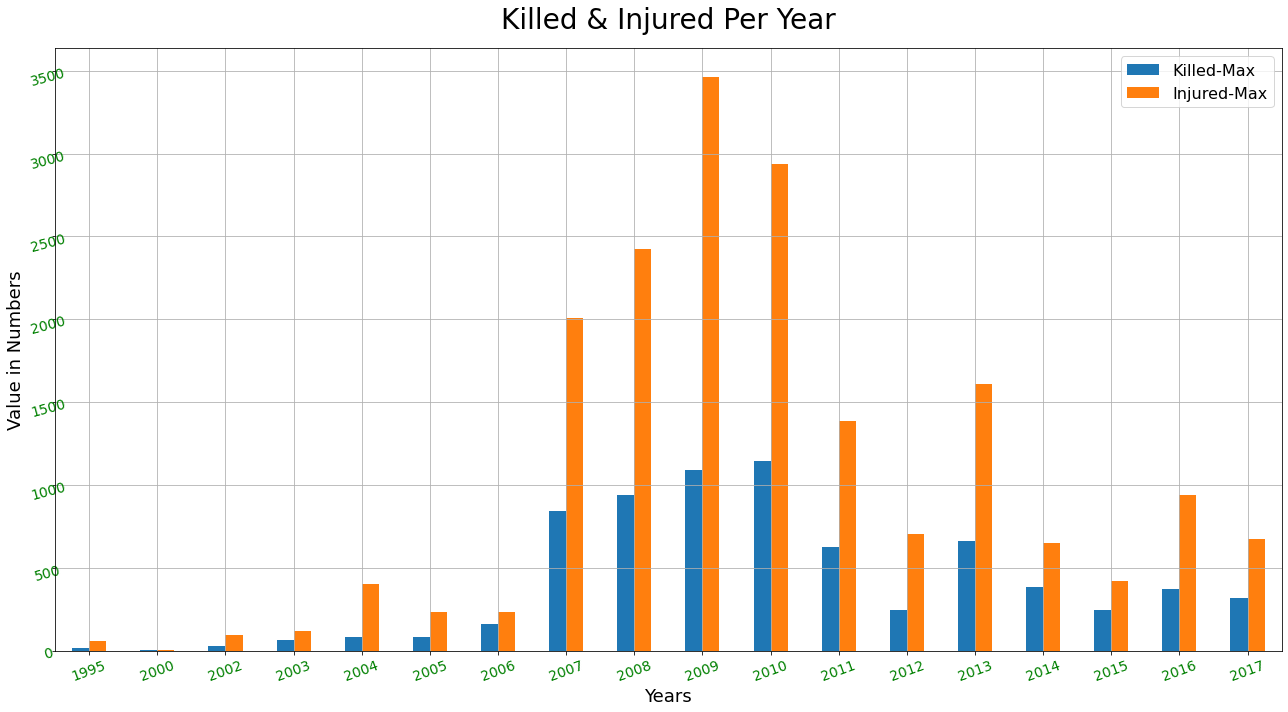

In [22]:

Killed_Injured_Per_Year = df_victims_per_year.groupby(["Year"], as_index=False).sum()
fig = Killed_Injured_Per_Year.plot(x="Year", 
                y=["Killed-Max","Injured-Max"], 
                kind="bar", 
                figsize=(18,10), align='center'
                 )
fig.set_title("Killed & Injured Per Year", pad=20, fontdict={'fontsize':28})
plt.xticks(rotation=20, horizontalalignment="center",fontsize=14, color='g')
plt.yticks(rotation=15, horizontalalignment="center",fontsize=14, color='g')
plt.xlabel("Years", fontsize=18)
plt.ylabel("Value in Numbers", fontsize=18)
fig.legend(loc=1,fontsize=16)
plt.grid(True)
plt.tight_layout()
# Need to check why hover is not working
#mplcursors.cursor()
#plt.show()

# Victims Per Year

In [23]:
# Data fetching from df_victims_per_year dataframe
Victims_Per_Year = df_victims_per_year.groupby(["Year"], as_index=False).sum()

# Drop unWanted Column
Victims_Per_Year.drop('Killed-Min', axis=1, inplace = True)
Victims_Per_Year.drop('Injured-Min', axis=1, inplace = True)

# Data representation in table
Victims_Per_Year.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#00FF7F'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:hover',
  'props': [('background', '#FFE4C4')]},
 
]
).hide_index()

Year,Killed-Max,Injured-Max,Victims
1995,15,60,75
2000,3,3,6
2002,27,91,118
2003,65,115,180
2004,82,399,481
2005,83,230,313
2006,161,230,391
2007,842,2008,2850
2008,940,2426,3366
2009,1092,3462,4554


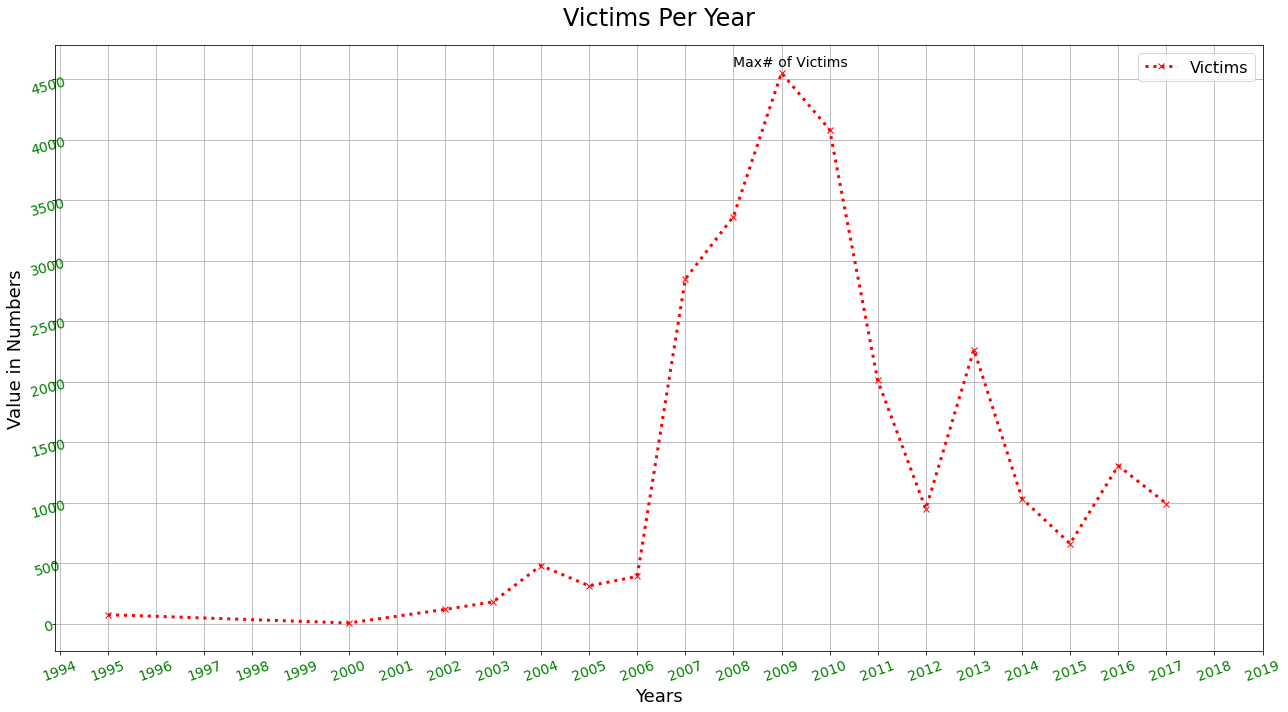

In [24]:
# Data Plot section of victims per year
fig = Victims_Per_Year.plot(x="Year", y="Victims", figsize=(18,10),marker='x', c='r', ls=':', lw=3)

# x & y range values
xvals = np.arange(1994, 2020, 1)
yvals = np.arange(0,5000,500)

# title setting
fig.set_title("Victims Per Year", pad=20, fontdict={'fontsize':24})
plt.xticks(ticks=xvals, rotation=20, horizontalalignment="center",fontsize=14, color='g')
plt.yticks(ticks=yvals, rotation=15, horizontalalignment="center",fontsize=14, color='g')

# label setting
plt.xlabel("Years", fontsize=18)
plt.ylabel("Value in Numbers", fontsize=18)

# annotation
plt.annotate("Max# of Victims", xy=(2008,4610), fontsize=14)

# legend configs
fig.legend(loc=1,fontsize=16)
plt.grid(True)
plt.tight_layout()

# Heat Map represntation on Openstreet

In [25]:
# Need to import folium module in order to render this open street map
# Reference : http://bibmartin.github.io/folium_docs/module/folium.html

import folium
from folium import plugins

# passing Latitude & Longitude Data
dfmap = df_suicide_data[['Latitude', 'Longitude']]
dfmap = dfmap.dropna()
#dfmap.isna().sum()

# Folium Map function
blast_map = folium.Map(location=[33.718,73.0718],zoom_start = 5.5,min_zoom = 2.0,tiles = 'OpenStreetMap')
blast_map.add_child(plugins.HeatMap(dfmap))
blast_map

# Blasts_Per_Province Visualization with PIE Graph

In [26]:
# Fetching Province Data
# Creating  a size column
Blasts_Per_Province = df_suicide_data.groupby('Province',as_index=False).size()

# Data tabular Representation
Blasts_Per_Province.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#00FF7F'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:hover',
  'props': [('background', '#FFE4C4')]},
 
]
).hide_index()

Province,size
AJK,6
Balochistan,47
Fata,73
ICT,20
KPK,251
Punjab,64
Sindh,35


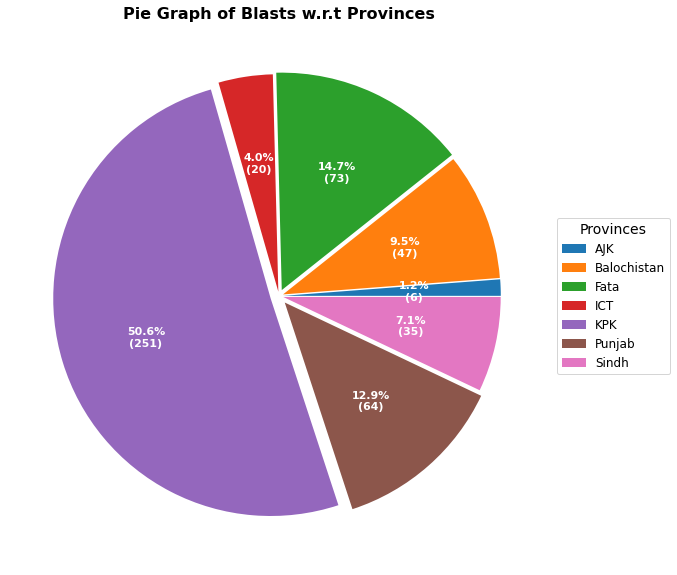

In [27]:
# Reference : https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_and_donut_labels.html

# Graph figure and plots
fig, ax = plt.subplots(figsize=(18, 10), subplot_kw=dict(aspect="equal"))

# passing data values
data = Blasts_Per_Province['size']
ingredients = Blasts_Per_Province['Province']
explode = (0.02, 0.02, 0.03, 0.02, 0.04, 0.04, 0.02)  # exploding factor to divide 

# function to fetch labels in pie graph
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), explode=explode)
# legend section
ax.legend(wedges, ingredients,
          title="Provinces",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),fontsize=12,title_fontsize=14)

plt.setp(autotexts, size=11, weight="bold")

ax.set_title(label="Pie Graph of Blasts w.r.t Provinces",fontdict = {'fontsize': 16, 'fontweight': "bold"})

plt.show()

# City Wise Blast Number on Bar Graph

In [28]:
# Fetching City Data
Blasts_Per_City = df_suicide_data.groupby('City',as_index=False).size()

# sorting data
Blasts_Per_City_Sorted = Blasts_Per_City.sort_values(by=['size'], ascending=False)

# tabular representation of data
Blasts_Per_City_Sorted.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#00FF7F'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', 'white')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', '#DCDCDC')]},
 
 {'selector': 'tr:hover',
  'props': [('background', '#FFE4C4')]},
 
]
).hide_index()

City,size
Peshawar,75
Quetta,38
Swat,30
Karachi,29
Lahore,25
Bannu,24
North-Waziristan,24
Islamabad,20
Rawalpindi,19
Hangu,17


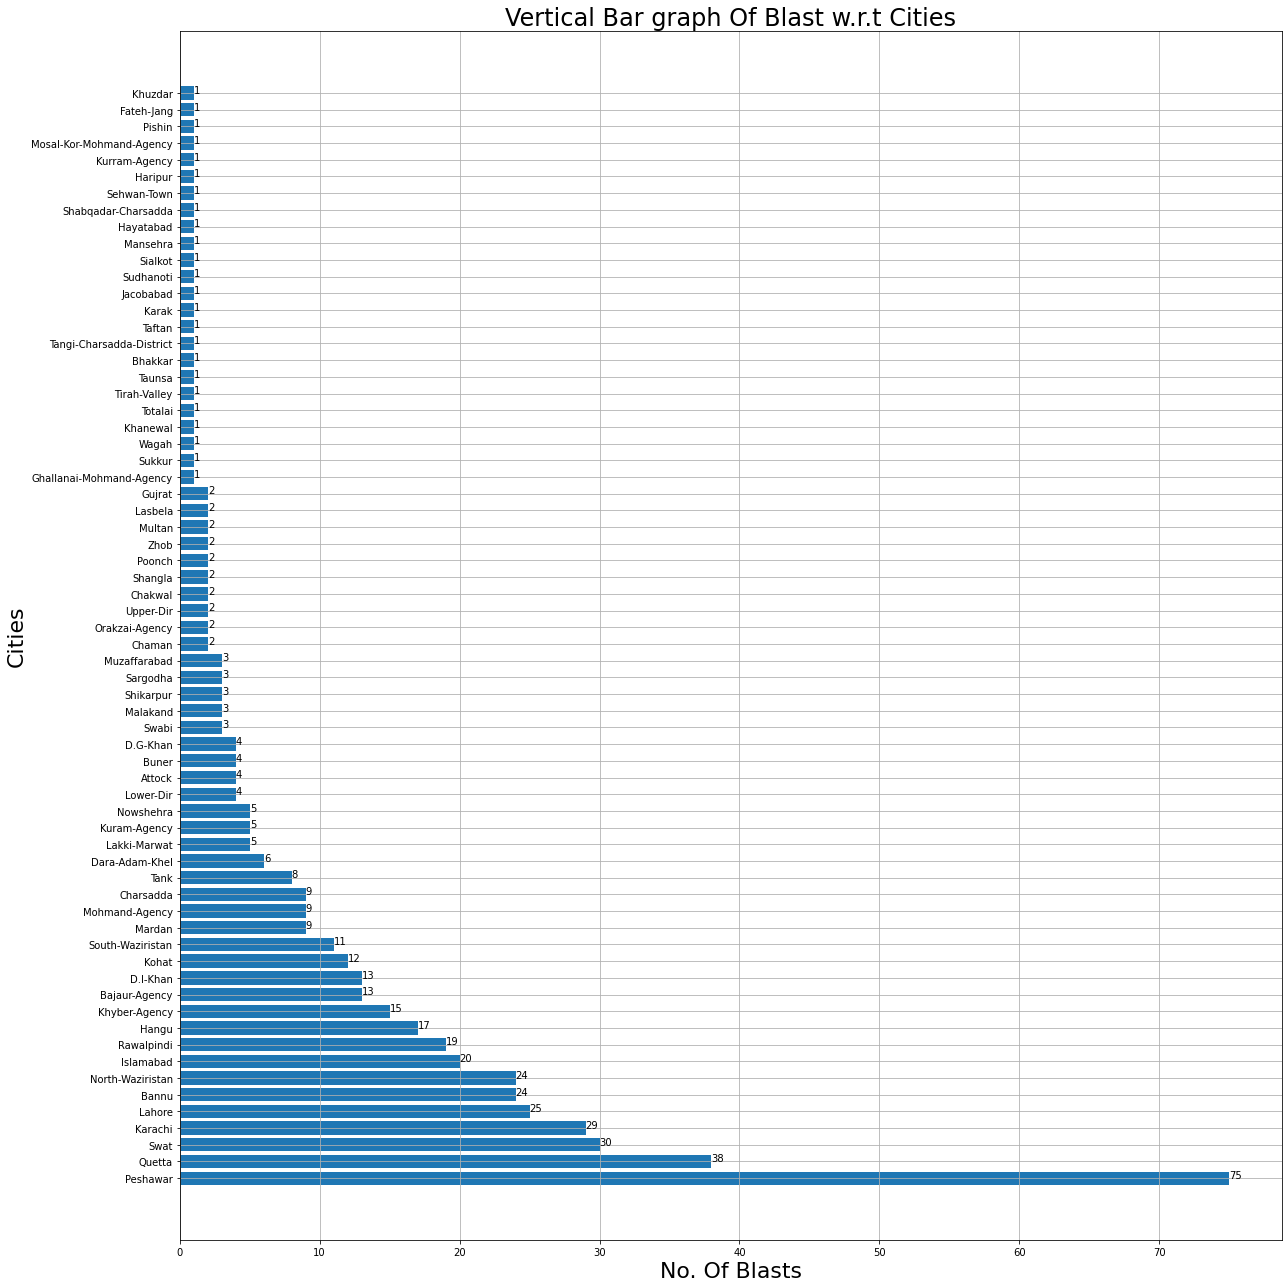

In [29]:
# plot figure size
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot()

# putting x & y values
x_val=Blasts_Per_City_Sorted['size']
y_val=Blasts_Per_City_Sorted['City']

ax.barh(y=y_val, width=x_val)

# title and label creation sectio
plt.title("Vertical Bar graph Of Blast w.r.t Cities", fontsize=24)
plt.ylabel("Cities", fontsize=22)
plt.xlabel("No. Of Blasts", fontsize=22)
plt.grid(True)
plt.tight_layout()

# custom annotation section
for ind in Blasts_Per_City_Sorted.index:
    plt.annotate(Blasts_Per_City_Sorted['size'][ind],(Blasts_Per_City_Sorted['size'][ind],Blasts_Per_City_Sorted['City'][ind]))   
    

# Blasts w.r.t HolidayType on two Different Scatter Plot

In [30]:
# fetching Hoiday Type Data
#aggregating data with dropna=false
Blasts_WRT_HolidayType = df_suicide_data.groupby('Holiday-Type',as_index=False,dropna=False).size()

# transforming nan values
Blasts_WRT_HolidayType['Holiday-Type'].fillna('none',inplace=True)

# Tabular representation of data
Blasts_WRT_HolidayType.head(20).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background', 'yellow')]},
 
]
).hide_index()

Holiday-Type,size
Ashura-Holiday,6
Christmas/Quaid-e-azam's Birthday,2
Defence-day,1
Eid milad un-nabi,3
Eid-Holidays,2
Eid-ul-Azha,2
Eid-ul-Fitar,3
General-Elections,1
Iqbal-Day,2
Labour Day,3


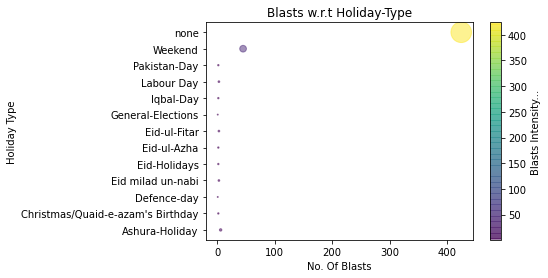

In [31]:
# reading values from dataframe in x and y 
x_val = Blasts_WRT_HolidayType['size']
y_val = Blasts_WRT_HolidayType['Holiday-Type']

# set the sizes of marker in scatter plot as the multiple of price column
sizes = Blasts_WRT_HolidayType['size'].astype(int)

# also set the color of markers according to the size
colors = sizes

# plot data on scatter plot, by passing sizes and colors as parameter
# s is the marker size and c is the list of colors
# alpha is the blending value, which we can set between 0 (transparent) and 1 (opaque)
plt.scatter(x_val, y=y_val, s=sizes, c=colors, alpha=0.5)
cbar = plt.colorbar()
cbar.set_label('Blasts Intensity...')

# setting labels and title
plt.xlabel("No. Of Blasts")
plt.ylabel("Holiday Type")
plt.title("Blasts w.r.t Holiday-Type")

plt.show()

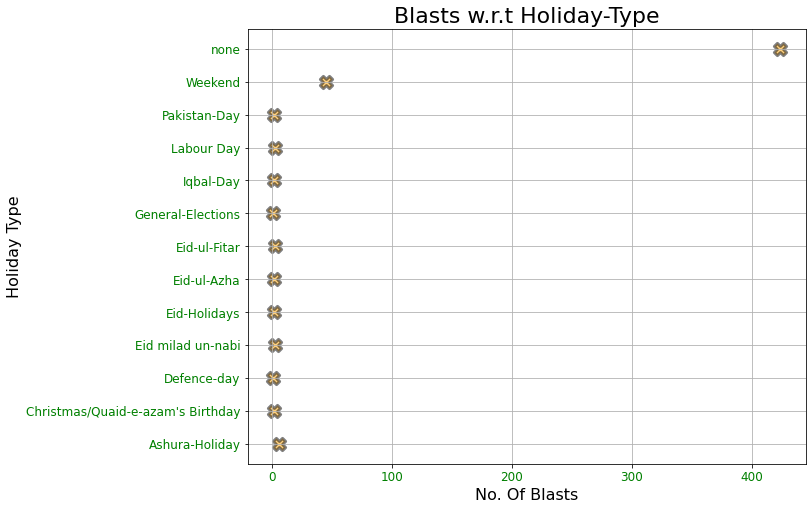

In [32]:
# reading values from dataframe in x and y 
x_val = Blasts_WRT_HolidayType['size']
y_val = Blasts_WRT_HolidayType['Holiday-Type']

# Create figure and axes objects
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()

# Draw Scatter plot where two points intersect in l1 and l2
ax.scatter(x=x_val, y=y_val, s=150, marker='X', color='orange', edgecolor='black', lw=3, alpha=0.5)

# adding labels
ax.set_xlabel("No. Of Blasts", fontsize=16)
ax.set_ylabel("Holiday Type", fontsize=16)
plt.xticks(rotation=0, color='g', fontsize=12)
plt.yticks(rotation=0, color='g', fontsize=12)

# adding title
plt.title("Blasts w.r.t Holiday-Type", fontsize=22)

plt.grid(True)
plt.show()

# Blast Day Type On Donut Graph 

In [33]:
# Blast w.r.t DayType data fetch
#aggregating data with dropna=false
Blasts_WRT_BlastDayType = df_suicide_data.groupby('Blast-Day-Type',as_index=False,dropna=False).size()

# filling nan values
Blasts_WRT_BlastDayType['Blast-Day-Type'].fillna('NAN Value day',inplace=True)

# tabular representation of data
Blasts_WRT_BlastDayType.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background', 'yellow')]},
 
]
).hide_index()

Blast-Day-Type,size
Holiday,78
Weekend,5
Working day,403
NAN Value day,10


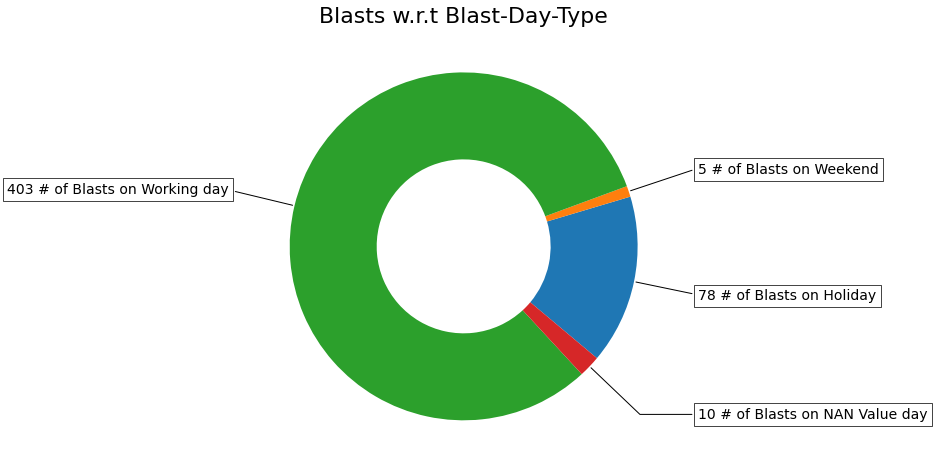

In [34]:
# Reference : https://matplotlib.org/3.5.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py

# adding labels using custom code
recipe= []
for ind in Blasts_WRT_BlastDayType.index:
    value= str(Blasts_WRT_BlastDayType['size'][ind])+' # of Blasts on '+str(Blasts_WRT_BlastDayType['Blast-Day-Type'][ind])
    recipe.append(value)

# graph config section    
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
data = Blasts_WRT_BlastDayType['size']
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

# graph rendering
for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y),fontsize=14, xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
# title section
ax.set_title("Blasts w.r.t Blast-Day-Type", fontsize=22)

plt.show()

#  Blasts representation of Location Category on Vertical Bar Graph 

In [35]:
# transforming data for white and empty spaces
df_suicide_data['Location-Category'] = df_suicide_data['Location-Category'].replace('', 'White Space')
df_suicide_data['Location-Category'] = df_suicide_data['Location-Category'].replace(' ', 'Empty Space')

# aggregating data with dropna=false
Blasts_WRT_Location_Category = df_suicide_data.groupby('Location-Category',as_index=False,dropna=False).size()
Blasts_WRT_Location_Category['Location-Category'].fillna('NAN Value',inplace=True)

# sorting data
Blasts_WRT_Location_Category_Sorted = Blasts_WRT_Location_Category.sort_values(by=['size'])

# tabular representation of data
Blasts_WRT_Location_Category_Sorted.head(25).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background', 'yellow')]},
 
]
).hide_index()

Location-Category,size
Airport,1
Civilian,1
Foreigner,1
Government-Official,1
Government/Office-Building,1
Highway,1
White Space,1
Residential-Building,1
Commercial/Residence,2
Bank,4


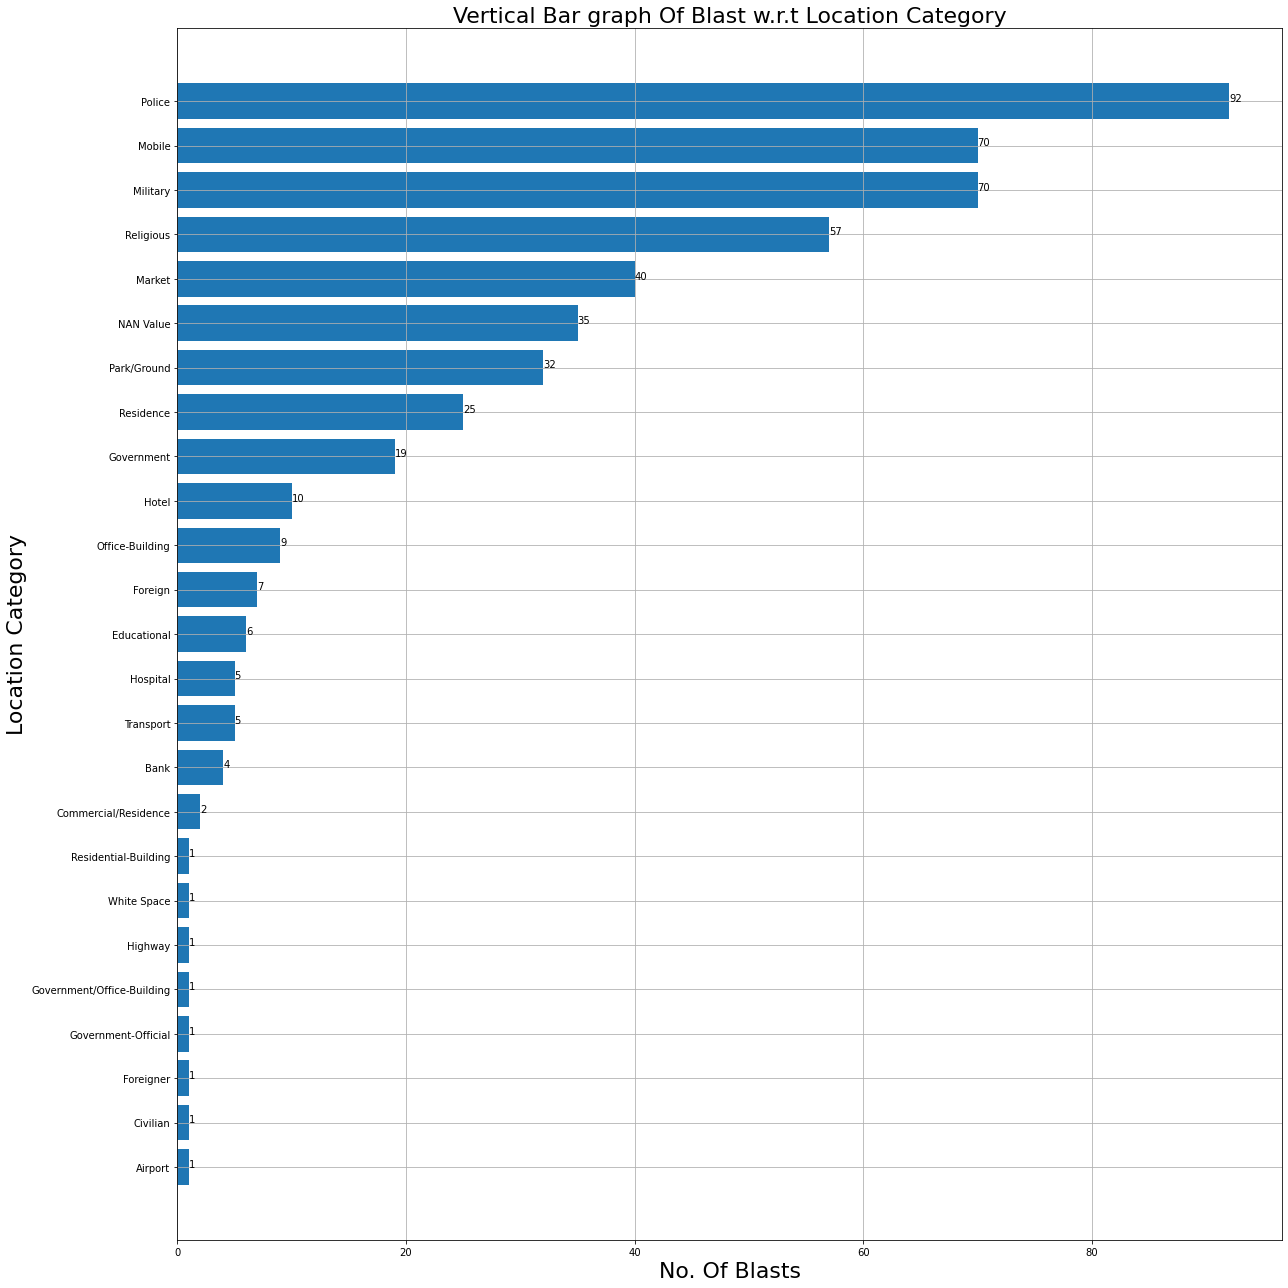

In [36]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot()

# assigning x & y values
x_val=Blasts_WRT_Location_Category_Sorted['size']
y_val=Blasts_WRT_Location_Category_Sorted['Location-Category']

ax.barh(y=y_val, width=x_val)

# title & label section 
plt.title("Vertical Bar graph Of Blast w.r.t Location Category", fontsize=22)
plt.ylabel("Location Category", fontsize=22)
plt.xlabel("No. Of Blasts", fontsize=22)
plt.grid(True)
plt.tight_layout()

# custom annotation section
for ind in Blasts_WRT_Location_Category_Sorted.index:
     plt.annotate(Blasts_WRT_Location_Category_Sorted['size'][ind],(Blasts_WRT_Location_Category_Sorted['size'][ind],Blasts_WRT_Location_Category_Sorted['Location-Category'][ind]))   


# Blasts w.r.t Location Sensitivity representation on Radar Graph 

In [37]:
# Data fetch section
Blasts_WRT_Location_Sensitivity = df_suicide_data.groupby('Location-Sensitivity',as_index=False,dropna=False).size()

# Replacing Nan values
Blasts_WRT_Location_Sensitivity['Location-Sensitivity'].fillna('NAN Value',inplace=True)

# Tabular representation of Data
Blasts_WRT_Location_Sensitivity.head(10).style.set_table_styles(
[{'selector': 'th',
  'props': [('background', '#7CAE00'), 
            ('color', 'Black'),
            ('font-family', 'verdana')]},
 
 {'selector': 'td',
  'props': [('font-family', 'verdana')]},

 {'selector': 'tr:nth-of-type(odd)',
  'props': [('background', '#DCDCDC')]}, 
 
 {'selector': 'tr:nth-of-type(even)',
  'props': [('background', 'white')]},
 
 {'selector': 'tr:hover',
  'props': [('background', 'yellow')]},
 
]
).hide_index()



Location-Sensitivity,size
High,264
Low,121
Medium,75
NAN Value,36


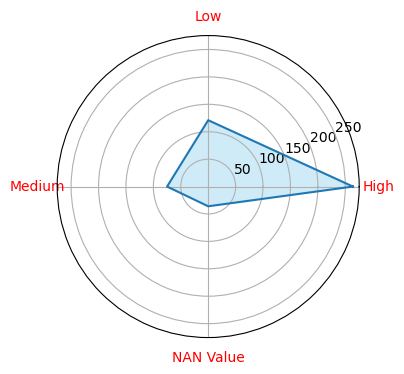

In [38]:
# creating Dataset
labels = Blasts_WRT_Location_Sensitivity['Location-Sensitivity'] 

# custom values append section
values= []
for ind in Blasts_WRT_Location_Sensitivity.index:
    value=Blasts_WRT_Location_Sensitivity['size'][ind]
    values.append(value)

# Append the first item to the last, making the circular graph close
values += values[:1]

# Calculate the angle for the value of each category
angles = [n / float(len(labels)) * 2 * math.pi for n in range(len(labels))]
angles += angles[:1]

#  Set the coordinate system as polar
fig, axe = plt.subplots(subplot_kw=dict(polar=True), dpi=100)

# setting ticks
axe.set_xticks(angles[:-1])

# setting tick labesl
axe.set_xticklabels(labels, color='r')

# Plotting Radar between angles and values
axe.plot(angles, values)
axe.fill(angles, values, 'skyblue', alpha=0.4)
plt.show()
